# Craft Beer Final Notebook

#### James Allen

This notebook is for exploring the craft beer data set

## Executive Summary

- a

- b

- c

## Conclusion

- a


In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

from acquire import beer_df, beer_states, top_beers

import warnings
warnings.filterwarnings("ignore")

# Acquire

In [2]:
# getting the beer data from my acquire file
df = beer_df()
df.head() # check_yo_head

,number,abv,ibu,id,beer,beer_style,brewery_id,ounces,brewery,city,state
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,NorthGate Brewing,Minneapolis,MN
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,Against the Grain Brewery,Louisville,KY
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,Jack's Abby Craft Lagers,Framingham,MA
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,Mike Hess Brewing Company,San Diego,CA
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,Fort Point Beer Company,San Francisco,CA


In [3]:
# using a describe to look at some statistics in the beer data
df.describe()

,number,abv,ibu,id,brewery_id,ounces
count,558.000000,542.000000,286.000000,558.000000,558.000000,558.000000
mean,278.500000,0.060825,43.027972,1519.008961,219.494624,13.391398
std,161.224998,0.013700,26.139556,788.197909,169.346041,1.964075
min,0.000000,0.032000,4.000000,9.000000,1.000000,8.400000
25%,139.250000,0.050250,22.000000,873.750000,60.000000,12.000000
50%,278.500000,0.058500,37.000000,1568.500000,187.000000,12.000000
75%,417.750000,0.068000,60.000000,2217.750000,368.000000,16.000000
max,557.000000,0.125000,138.000000,2686.000000,556.000000,24.000000


# Explore

(-0.5, 1199.5, 799.5, -0.5)

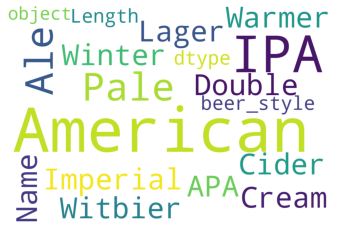

In [4]:
# making a wordcloud of the beer styles
from wordcloud import WordCloud

beers = df.beer_style

img = WordCloud(background_color='white', width=1200, height=800).generate(str(beers))
plt.imshow(img)
plt.axis('off')

In [5]:
# let's look at the top beers
top_beers().head()

,beer_type,total
0,American IPA,88
1,American Pale Ale (APA),54
2,American Amber / Red Ale,33
3,American Blonde Ale,25
4,American Double / Imperial IPA,24


Text(0.5, 1.0, '10 Top Flight Beers')

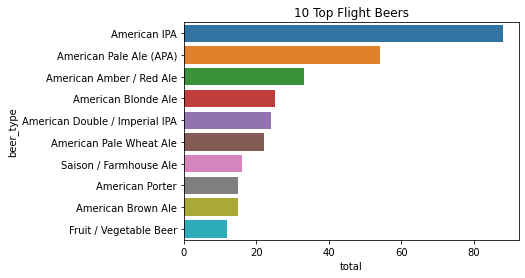

In [7]:
# 10 top flight beers in a bar chart
sns.barplot(x='total', y='beer_type', data=top_beers().head(10))
plt.title('10 Top Flight Beers')

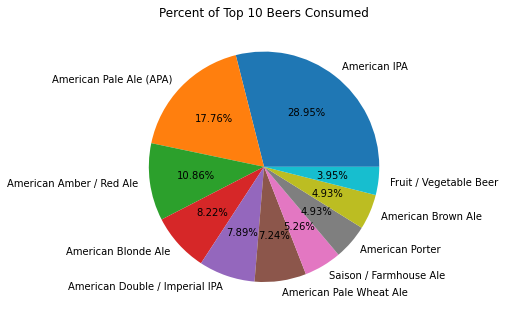

In [8]:
# top 10 beers percentage in a pie chart
top10_beers = top_beers().head(10)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = top10_beers['beer_type']
totals = top10_beers['total']
ax.pie(totals, labels = labels, autopct='%1.2f%%')
plt.title('Percent of Top 10 Beers Consumed')
plt.show()

<AxesSubplot:xlabel='abv', ylabel='Density'>

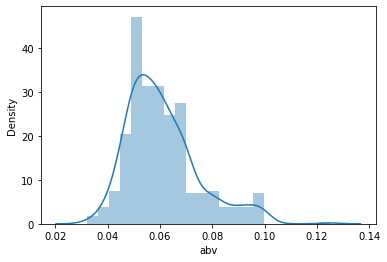

In [9]:
# plotting the alcohol by volume
sns.distplot(df.abv)

In [10]:
# let's take a look at the top 10 brewery states
beer_states().head(10)

,states,breweries
0,CO,47
1,CA,39
2,MI,32
3,OR,29
4,TX,28
5,PA,25
6,MA,23
7,WA,23
8,IN,22
9,WI,20


Text(0, 0.5, 'Number of Breweries')

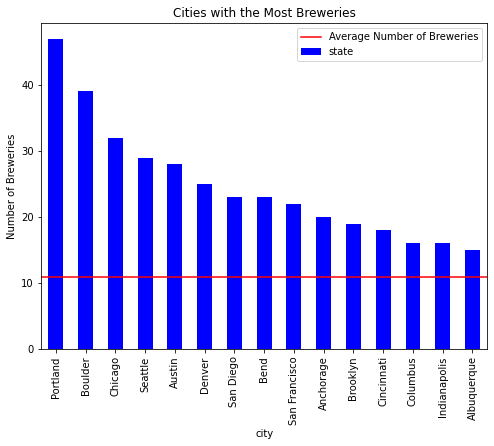

In [11]:
# plotting a bar graph for the number of breweries in each state
plot = df.state.value_counts().plot(kind='bar', title="Number of Breweries in Each State", \
                             figsize=(8,6), colormap='winter')
plot.set_xlabel('State')
plot.set_ylabel('Number of Breweries')

mean_line = plot.axhline(df.state.value_counts().mean(), color='r',\
                         label='Average Number of Breweries')
plt.legend()


#plotting a bar graph fro the cities with the most breweries
plot5 = df.groupby('city')['beer_style'].count().nlargest(15).plot(kind='bar', \
               title='Cities with the Most Breweries', \
               colormap='winter',  )
plot5.set_ylabel('Number of Breweries')